# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [2]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import random

# sklearn imports to shuffle and split data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#import to flatten
from tensorflow.contrib.layers import flatten

# Load pickled data
import pickle

# defining a dictionary of signs, easier than class number to diagnose

sign_dictionary ={'0': 'Speed limit (20km/h)',
'1':'Speed limit (30km/h)',
'2':'Speed limit (50km/h)',
'3':'Speed limit (60km/h)',
'4':'Speed limit (70km/h)',
'5':'Speed limit (80km/h)',
'6':'End of speed limit (80km/h)',
'7':'Speed limit (100km/h)',
'8':'Speed limit (120km/h)',
'9':'No passing',
'10':'No passing for vehicles over 3.5 metric tons',
'11':'Right-of-way at the next intersection',
'12':'Priority road',
'13':'Yield',
'14':'Stop',
'15':'No vehicles',
'16':'Vehicles over 3.5 metric tons prohibited',
'17':'No entry',
'18':'General caution',
'19':'Dangerous curve to the left',
'20':'Dangerous curve to the right',
'21':'Double curve',
'22':'Bumpy road',
'23':'Slippery road',
'24':'Road narrows on the right',
'25':'Road work',
'26':'Traffic signals',
'27':'Pedestrians',
'28':'Children crossing',
'29':'Bicycles crossing',
'30':'Beware of ice/snow',
'31':'Wild animals crossing',
'32':'End of all speed and passing limits',
'33':'Turn right ahead',
'34':'Turn left ahead',
'35':'Ahead only',
'36':'Go straight or right',
'37':'Go straight or left',
'38':'Keep right',
'39':'Keep left',
'40':'Roundabout mandatory',
'41':'End of no passing',
'42':'End of no passing by vehicles over 3.5 metric tons'}

# Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as ftrain:
    train = pickle.load(ftrain)
with open(testing_file, mode='rb') as ftest:
    test = pickle.load(ftest)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print (" Size of X_train is %d labels is %d" %(len(X_train), len(y_train)))
print (" X_train Labels are", train['labels'])
print (" Size of X_test is %d labels is %d" %(len(X_test), len(y_test)))
print (" X_test Labels are", test['labels'])

 Size of X_train is 34799 labels is 34799
 X_train Labels are [41 41 41 ..., 25 25 25]
 Size of X_test is 12630 labels is 12630
 X_test Labels are [16  1 38 ...,  6  7 10]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. <br>
**THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of testing examples
n_test = len(X_test)

# Checking that we have as many labels as data
assert(len(X_train)== len(y_train))
assert(len(X_test)== len(y_test))

# The shape of a traffic sign image: It returns a tuple of number of rows, columns and channels
image_shape = X_train[0].shape

# Unique classes/labels in the dataset:
# First we remove duplicates then we count
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of classes =", n_classes)
print("Image data shape =", image_shape)

if (image_shape[0]!=32):
    print ("RESIZE NEEDED!! LeNET takes in input 32x32 pixels images")


Number of training examples = 34799
Number of testing examples = 12630
Number of classes = 43
Image data shape = (32, 32, 3)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

 VISUALIZING TRAINING SET
index 2 is Speed limit (50km/h)
index 23 is Slippery road
index 18 is General caution
index 9 is No passing
index 7 is Speed limit (100km/h)
index 7 is Speed limit (100km/h)
index 34 is Turn left ahead
index 13 is Yield
index 19 is Dangerous curve to the left
index 4 is Speed limit (70km/h)
index 20 is Dangerous curve to the right
index 11 is Right-of-way at the next intersection
index 17 is No entry
index 7 is Speed limit (100km/h)
index 18 is General caution
index 22 is Bumpy road


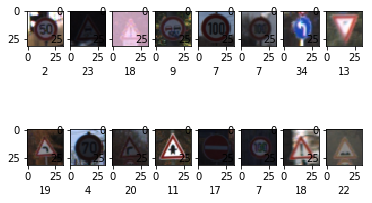

In [4]:
# Visualizing randomly 16 images from the training set

print (" VISUALIZING TRAINING SET")
for i in range(16):
    plt.subplot(2,8,i+1)
    index = random.randint(0,n_train)
    plt.imshow(X_train[index])
    plt.xlabel(y_train[index])
    str_index=str(y_train[index])
    print ("index %s is %s" %(str_index, sign_dictionary[str_index]))
    
plt.show()    

 VISUALIZING TESTING SET
index 5 is Speed limit (80km/h)
index 35 is Ahead only
index 10 is No passing for vehicles over 3.5 metric tons
index 38 is Keep right


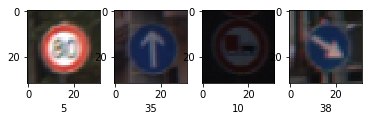

In [5]:
# Visualizing randomly 4 images from the test set

print (" VISUALIZING TESTING SET")
for i in range(4):
    plt.subplot(1,4,i+1)
    index = random.randint(0,n_test)
    plt.imshow(X_test[index])
    plt.xlabel(y_test[index])
    str_index=str(y_test[index])
    print ("index %s is %s" %(str_index, sign_dictionary[str_index]))

plt.show()    

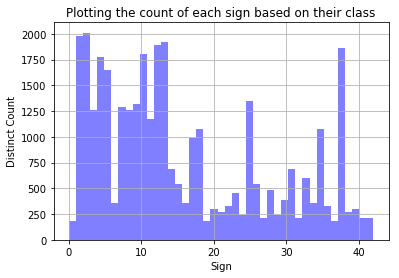

Number of elements per class:
 [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]


In [6]:
# plotting the count of each sign to get a frequency graph (assuming labelling is correct)

# Define colormap for graph
cm = plt.cm.get_cmap('RdYlBu_r')

n, bins, patches= plt.hist(y_train, bins = n_classes, facecolor = 'blue', alpha = 0.5)

plt.title('Plotting the count of each sign based on their class')
plt.xlabel('Sign')
plt.ylabel('Distinct Count')
plt.plot()
plt.grid(True)

plt.show()

# Some classes are unde represented
liste= []
arr, liste= np.unique(y_train, return_index=False, return_inverse=False, return_counts=True)

#Printing the number of elements per class
print ("Number of elements per class:\n",liste)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

<b>NORMALIZATION OF DATA so that the data has mean zero and equal variance in intensity:</b>
<br>colors on a 0-255 scale => 0-1 scale
<br>Follows the equation normalized = (x - min( x )) / (max ( x )- min( x ))

index 10823 is 24 or Road narrows on the right 


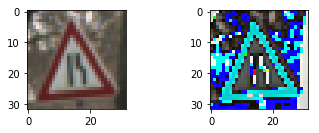

In [7]:
def normalize_image(X):
    X_norm = X
    X_norm = (X - X.mean())/(np.max(X) - np.min(X))
    #X = X / 255 * 0.8 + 0.1   
    return X_norm
"""
    X_Norm = np.zeros((len(X), 32, 32, 3), np.float64)
    for index, img in enumerate(X):
        X_Norm[index] = (img.astype(np.float64) - 128)/128
    return X_Norm
"""

# displaying an example of image before and after normalization
index=random.randint(0, n_train)
image_before_norm = X_train[index]
plt.subplot(2,2,1)
plt.imshow(image_before_norm)

X_train = normalize_image (X_train)
X_test = normalize_image (X_test)

print ("index %s is %s or %s "%(index,str(y_train[index]), sign_dictionary[str(y_train[index])]))
plt.subplot(2,2,2)

#image after normalization
plt.imshow(X_train[index])
plt.show()



<b> ADDING IMAGES IN CLASSES WITH VERY FEW INSTANCES </b>

indexes for class 0 is 

 [ 9960  9961  9962  9963  9964  9965  9966  9967  9968  9969  9970  9971
  9972  9973  9974  9975  9976  9977  9978  9979  9980  9981  9982  9983
  9984  9985  9986  9987  9988  9989  9990  9991  9992  9993  9994  9995
  9996  9997  9998  9999 10000 10001 10002 10003 10004 10005 10006 10007
 10008 10009 10010 10011 10012 10013 10014 10015 10016 10017 10018 10019
 10020 10021 10022 10023 10024 10025 10026 10027 10028 10029 10030 10031
 10032 10033 10034 10035 10036 10037 10038 10039 10040 10041 10042 10043
 10044 10045 10046 10047 10048 10049 10050 10051 10052 10053 10054 10055
 10056 10057 10058 10059 10060 10061 10062 10063 10064 10065 10066 10067
 10068 10069 10070 10071 10072 10073 10074 10075 10076 10077 10078 10079
 10080 10081 10082 10083 10084 10085 10086 10087 10088 10089 10090 10091
 10092 10093 10094 10095 10096 10097 10098 10099 10100 10101 10102 10103
 10104 10105 10106 10107 10108 10109 10110 10111 10112 10113 10114 10115
 10116 10117 10118 10119 

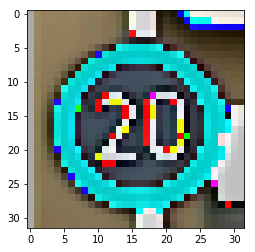

In [8]:
# Getting indexes of label of class 0 that has only 180 images, SEE Histogram
# It is possible to create artificially more examples applying some affine transforms like rotation of a couple of degrees

# List candidates:
searchval = 0

ii = np.where(y_train == searchval)[0] #from histogram
print ("indexes for class %d is \n\n %s"%(searchval,ii))

plt.subplot(1,1,1)
index_image_class_0 = min(ii)
print ("printing index ", index_image_class_0)
plt.imshow(X_train[index_image_class_0]) # Presenting one element of this class
plt.show()


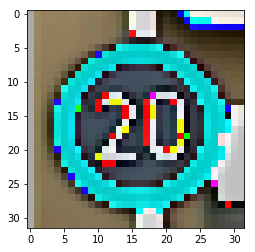

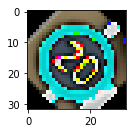

In [9]:
import cv2

# Create a function to rotate image in order to extend the classes with too few images
def image_rotate(img):
        row, col, channel = img.shape

        angle = np.random.uniform(-60, 60)
        rotation_point = (row / 2, col / 2)
        rotation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, 1)

        rotated_img = cv2.warpAffine(img, rotation_matrix, (col, row))
        return rotated_img


#plt.subplot(2,2,1)
image = X_train[9960]
plt.imshow(image)
plt.show()

plt.subplot(2,2,2)
img_rotated = image_rotate (image)
plt.imshow(img_rotated)
plt.show()


label:  10008
label:  10009
label:  10010
label:  10011
label:  10012
label:  10128
label:  10129
label:  10130
label:  10131
label:  10132
label:  10133
label:  10134
label:  10135
label:  10136


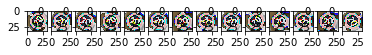

 New size of the training data 34813 versus 34799 before


In [10]:
# adding 14 images in the training sets from 5 under represented classes

train_augmented = list()
train_augmented_labels = list()
i=1

#For the sake of examples here is a list of indexes belonging to the same class
for index in [10008,10009,10010,10011,10012,10128,10129,10130,10131,10132,10133,10134,10135,10136]:
       
    img = X_train [index]
    label_class = y_train [index]
    train_augmented.append(image_rotate(image))
    train_augmented_labels.append(label_class)
    plt.subplot(1,14,i)
    i=i+1
    plt.imshow(normalize_image(image_rotate(image)))
    print ("label: ",index) 
plt.show()   
    
#adding the rotated images  
X_train_augmented = np.concatenate((X_train, train_augmented), axis=0)
y_train_augmented = np.concatenate((y_train, train_augmented_labels))

print (" New size of the training data %d versus %d before"%(len(X_train_augmented), n_train))

<b><h2>Add more data (i.e. rotated images) in each class:</h2></b>


### Split Data into Training, Validation and Test Sets

In [11]:
### Split the data into training/validation/testing sets here.
### Before splitting we shuffle the cards using scikit examples:
## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
## http://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

X_train_norm = X_train #Data were normalized above, I keep this line for another normalization function
X_test_norm = X_test

      
#shuffling the Data
X_train_norm, y_train = shuffle(X_train_norm, y_train)
print("DATA SHUFFLED --")

# SPLITTING THE DATA using 20% to create the validation set
X_train_norm, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.2, random_state=42)
print ("DATA SPLIT --")



DATA SHUFFLED --
DATA SPLIT --


# Question 3 - Model Architecture: LeNET


LeNet departs from the usual ConvNets that are organized in strict feed-forward layered architectures in which the output of one layer is fed only to the layer above (cf article, II Architecture, Multi-Scale Features).

In LetNET the output of the first stage is branched out and fed to the classifier, in addition to the output of the second stage . The output of the first stage after pooling/subsampling rather than before. Additionally, applying a second subsampling
stage on the branched output yielded higher accuracies than
with just one

ConvNet typically use 3 parts:
a) a convolutional filter
b) a non linear transform filter
c) a spatial feature pooling layer to lower the resolution of the representation


<b>Patch Size: 5x5 </b><br>
<b>Padding = VALID </b>

<b>Layer 1: </b><br>
    a) Convolutional filter: SInce the input image is 32x32x3 and we have a kernel of 5 the output shape is 28x28x32.<br>  
    b) Non linear transform layer-Activation layer: RELU is being used because it is computationally faster to execute (faster than sigmoid for instance) and solves some gradient issues like vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training (https://en.wikipedia.org/wiki/Vanishing_gradient_problem).<br>
    c) Pooling layer to lower the resolution, the output shape is 14x14x32.<br>


<b>Layer 2: </b><br>
    a) Convolutional filter: The output shape is 10x10x16.<br>
    b) Non linear transform layer-Activation layer: RELU is being used<br>
    c) Pooling layer to lower the resolution, the output shape is 5x5x16.<br>

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten.

<b>Layer 3: </b><br>
    a) Fully Connected. This should have 120 outputs.<br>
    b) Activation. RELU<br><br>


<b>Layer 4: </b><br>
    a) Fully Connected. This should have 84 outputs.<br>
    b) Activation. RELU<br>

<b>Layer 5: </b><br>
    a) Fully Connected (Logits).<br>
    b) This should have 43 outputs.<br>



<br>
<img src="assets/kernel_convolution.jpg">CONVOLUTION</img>
<br><br>sources: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/
<br>
https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/ConvolutionOperations/ConvolutionOperations.html

In [12]:
### Define the architecture here.

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    patch_size = 5
    channels = 3 # channels is the 3 colors depth of the image
    filter_depth = 32 
    drop_pool_down_sizing=0.80 # keep 80% f neurons

    
 
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32. 
    # Weights are initialzed first
    conv1_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, channels, filter_depth), mean = mu, stddev = sigma))
    # Bias is initialized to zero 
    conv1_b = tf.Variable(tf.zeros(filter_depth))
    # conv1=XW+1
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print ("shape of conv1-a", conv1.get_shape().as_list())

    # Activation with a RELU function to make the network non linear
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x32. Output = 14x14x32 to reduce the size of the network
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, drop_pool_down_sizing)
    print ("shape of conv1-b", conv1.get_shape().as_list())
    
    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, filter_depth, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print ("shape of conv2-a", conv2.get_shape().as_list())
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print ("shape of conv2-b", conv2.get_shape().as_list())

    # flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    print ("shape of fc0", fc0.get_shape().as_list())

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    print ("shape of fc1", fc1.get_shape().as_list())

    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SActivation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [13]:
### Train the model here.
### Calculate and report the accuracy on the training and validation set.

EPOCHS = 12 # a value of 14 gives a 94% accuracy 
BATCH_SIZE= 256

# Creating a placeholder variable to hold input images, depth of 3 as we keep the three colors
x_input = tf.placeholder("float", [None, 32, 32, 3])

# Creating a placeholder variable to hold labels
y_labels = tf.placeholder("int32", [None])

# To one-hot encode the labels 
y_one_hot = tf.one_hot(y_labels, depth=43, on_value=1., off_value=0., axis=-1)

# CONSTRUCT THE MODEL USING the LeNET model
rate= 0.001
logits= LeNet(x_input)


shape of conv1-a [None, 28, 28, 32]
shape of conv1-b [None, 14, 14, 32]
shape of conv2-a [None, 10, 10, 16]
shape of conv2-b [None, 5, 5, 16]
shape of fc0 [None, 400]
shape of fc1 [None, 120]


In [14]:
# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
loss_operation= tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation=optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x_input: batch_x, y_labels: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
   

In [15]:
import time

# Train the MODEL
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    begin_time = time.time()
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x_input: batch_x, y_labels: batch_y})
        
        #Validating the trained model on the Evaluation data    
        validation_accuracy = evaluate(X_val, y_val)   
        #print("\nEPOCH {} ...".format(i+1))
        print("EPOCH {} : Accuracy on validation data = {:.3f}".format(i+1, validation_accuracy))
        print("time from start: {:.3f}".format(time.time()-begin_time))        
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 : Accuracy on validation data = 0.359
time from start: 40.207
EPOCH 2 : Accuracy on validation data = 0.634
time from start: 78.786
EPOCH 3 : Accuracy on validation data = 0.569
time from start: 115.957
EPOCH 4 : Accuracy on validation data = 0.828
time from start: 153.230
EPOCH 5 : Accuracy on validation data = 0.820
time from start: 190.558
EPOCH 6 : Accuracy on validation data = 0.864
time from start: 233.321
EPOCH 7 : Accuracy on validation data = 0.916
time from start: 275.232
EPOCH 8 : Accuracy on validation data = 0.855
time from start: 312.752
EPOCH 9 : Accuracy on validation data = 0.887
time from start: 351.308
EPOCH 10 : Accuracy on validation data = 0.928
time from start: 388.755
EPOCH 11 : Accuracy on validation data = 0.921
time from start: 426.550
EPOCH 12 : Accuracy on validation data = 0.932
time from start: 464.664
Model saved


In [16]:
### Run the predictions on the TEST set before image augmentation

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    print("Model restaured successfully")
    
    my_accuracy = evaluate(X_test_norm, y_test)
    #my_accuracy = evaluate(Extra_image_from_web, german_label)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))
   

INFO:tensorflow:Restoring parameters from ./lenet
Model restaured successfully
Test Set Accuracy = 0.851


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['12', '18', '22', '38', '40']


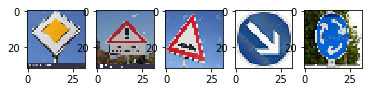

In [17]:
import csv
import os
import cv2
import skimage
from skimage import io
from skimage import transform
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #to clean the notebook ignore warnings
%matplotlib inline

### Load the images from german_signs, display them and add them to the training set

def normalize(data): #not used
    return data / 255 * 0.8 + 0.1

def extra_german_sign(Extra_image_from_web, german_labels):
    
    i=1
    german_labels = []
    for file in sorted(os.listdir("assets/")):
        img = transform.resize(mpimg.imread('assets/' + file),(32,32), order=3)
        Extra_image_from_web.append(img)
        
        #creating label with the first 2 charcaters of the file name
        german_labels.append((file[:2]))
        
        plt.subplot(1,5,i)
        plt.imshow(img)
        i+=1
        
    print(german_labels)    
    plt.show()    
    return Extra_image_from_web, german_labels

german_labels = []
Extra_image_from_web = []
Extra_image_from_web, german_labels = extra_german_sign(Extra_image_from_web, german_labels)


#Extra_image_from_web_normalized =normalize (Extra_image_from_web)
#Extra_image_from_web = np.asarray(Extra_image_from_web)


### Predict the Sign Type for Each Image and Performance

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

results=[]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    print("Model restaured successfully")
    
    predicted_logits  = sess.run(logits, feed_dict={x_input: Extra_image_from_web})
    predicted_labels = np.argmax(predicted_logits, axis=1)
    
    #displaying the predicted signs:
    for i in range(len(german_labels)):
        print("Expected label {0} - Prediction: {1}".format(german_labels[i], predicted_labels[i]))
   
    #Printing Accuracy 
    my_accuracy = evaluate(Extra_image_from_web, german_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))
   

INFO:tensorflow:Restoring parameters from ./lenet
Model restaured successfully
Expected label 12 - Prediction: 17
Expected label 18 - Prediction: 18
Expected label 22 - Prediction: 1
Expected label 38 - Prediction: 38
Expected label 40 - Prediction: 40
Test Set Accuracy = 0.600


### ### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    softmax = tf.nn.softmax(predicted_logits)
    top5 = sess.run(tf.nn.top_k(softmax, k=5))
    for x in range(len(german_labels)):
        print("Image test is {0}:\n".format(sign_dictionary[str(german_labels[x])]))
        for y in range(len(german_labels)):
            print("{0}: {1}".format(sign_dictionary[str(top5[1][x][y])], top5[0][x][y]*100))
        print()


Image test is Priority road:

No entry: 99.9902606010437
General caution: 0.007724746683379635
Priority road: 0.001974385122593958
Traffic signals: 3.0800936201558216e-05
Speed limit (70km/h): 8.91832718785679e-09

Image test is General caution:

General caution: 99.99876022338867
Children crossing: 0.0006373226824507583
Speed limit (70km/h): 0.00027391204184823437
No vehicles: 0.0001595024627931707
Traffic signals: 0.00010822510603247792

Image test is Bumpy road:

Speed limit (30km/h): 57.68335461616516
Speed limit (20km/h): 41.79559051990509
No entry: 0.5152513738721609
End of all speed and passing limits: 0.005257204611552879
Children crossing: 0.0005015529495722149

Image test is Keep right:

Keep right: 99.97866749763489
General caution: 0.01106388444895856
Children crossing: 0.01022687938529998
End of speed limit (80km/h): 2.2136525501537108e-05
Right-of-way at the next intersection: 1.1300022606519633e-05

Image test is Roundabout mandatory:

Roundabout mandatory: 99.9997258186